In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML
import os

In [2]:
nrc_file = "/Users/sydneymathiason/Documents/MSDS/Spring/DS5001/data/lexicons/sources/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [3]:
nrc = pd.read_csv(nrc_file, sep='\t', header=None)
nrc.columns = ['term_str','nrc_emotion','val']
nrc = nrc.set_index(['term_str','nrc_emotion'])
nrc = nrc.unstack()
nrc.columns = nrc.columns.droplevel(0)
nrc = nrc[nrc.sum(1) > 1]
nrc.columns = ['nrc_'+col for col in nrc.columns]

In [4]:
nrc.sum().sort_values(ascending=False)

nrc_negative        2366
nrc_fear            1368
nrc_positive        1281
nrc_anger           1208
nrc_sadness         1137
nrc_disgust         1004
nrc_trust            935
nrc_joy              686
nrc_anticipation     682
nrc_surprise         454
dtype: int64

In [5]:
nrc.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust
term_str,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abduction,0,0,0,1,0,1,0,1,1,0
aberration,0,0,1,0,0,1,0,0,0,0


In [6]:
nrc['nrc_sentiment'] =nrc.nrc_positive - nrc.nrc_negative
nrc['nrc_sentiment'].sample(10)

term_str
despotism    -1
assault      -1
versus       -1
atrocious    -1
injure       -1
oppressor    -1
unpopular    -1
alerts        0
infidelity   -1
funk         -1
Name: nrc_sentiment, dtype: int64

In [7]:
nrc.to_csv('/Users/sydneymathiason/Documents/MSDS/Spring/DS5001/data/lexicons/salex_nrc.csv')

In [8]:
salex_csv = '/Users/sydneymathiason/Documents/MSDS/Spring/DS5001/data/lexicons/salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [9]:
OHCO = ['book_num', 'chap_num']

In [10]:
TOKENS = pd.read_csv("data/CORPUS.csv").set_index(OHCO).sort_index()
VOCAB = pd.read_csv("data/VOCAB.csv").set_index('term_str').sort_index()
LIB = pd.read_csv("data/LIB.csv").set_index('book_num')[['author','title']].sort_index()
BOW = pd.read_csv("data/BOW.csv").set_index(['book_num','chap_num','term_str']).sort_index()

In [11]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [12]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [13]:
VOCAB_SENT = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1)

In [14]:
VOCAB_SENT.head()

,n,n_chars,p,i,max_pos,max_pos_group,stop,porter_stem,dfidf,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,
abandon,10,7,0.000016,15.974273,VB,VB,0,abandon,41.678774,0,0,0,1,0,1,0,1,0,0,-1
abandoned,39,9,0.000061,14.010799,VBN,VB,0,abandon,92.256860,1,0,0,1,0,1,0,1,0,0,-1
abandonment,3,11,0.000005,17.711239,NN,NN,0,abandon,18.647812,1,0,0,1,0,1,0,1,1,0,-1
aberration,1,10,0.000002,19.296202,NN,NN,0,aberr,7.800900,0,0,1,0,0,1,0,0,0,0,-1
abhorrent,1,9,0.000002,19.296202,JJ,JJ,0,abhorr,7.800900,1,0,1,1,0,1,0,0,0,0,-1


In [15]:
BOW_SENT = BOW.join(VOCAB_SENT[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [16]:
BOW_SENT.head()

n     tfidf max_pos  anger  anticipation  \
book_num chap_num term_str                                              
0        1        abandoned  1  0.008401     VBN    1.0           0.0   
                  aching     1  0.014337     VBG    0.0           0.0   
                  alive      2  0.007254      JJ    0.0           1.0   
                  anger      1  0.006015      NN    1.0           0.0   
                  angry      1  0.005646      JJ    1.0           0.0   

                             disgust  fear  joy  sadness  surprise  trust  \
book_num chap_num term_str                                                  
0        1        abandoned      0.0   1.0  0.0      1.0       0.0    0.0   
                  aching         0.0   0.0  0.0      1.0       0.0    0.0   
                  alive          0.0   0.0  1.0      0.0       0.0    1.0   
                  anger          0.0   0.0  0.0      0.0       0.0    0.0   
                  angry          1.0   0.0  0.0      0.0       0.0    0.0   

                             sentiment  
book_num chap_num term_str              
0        1        abandoned       -1.0  
                  aching          -1.0  
                  alive            1.0  
                  anger           -1.0  
                  angry           -1.0

In [17]:
CHAP_SENT = BOW_SENT.groupby(['book_num','chap_num'])[emo_cols].mean()


In [18]:
CHAP_SENT

anger  anticipation   disgust      fear       joy  \
book_num chap_num                                                         
0        1         0.317365      0.287425  0.221557  0.329341  0.323353   
         2         0.218310      0.302817  0.197183  0.387324  0.260563   
         3         0.268293      0.292683  0.186992  0.300813  0.333333   
         4         0.236364      0.345455  0.181818  0.345455  0.336364   
         5         0.215385      0.284615  0.161538  0.276923  0.361538   
...                     ...           ...       ...       ...       ...   
5        53        0.000000      1.000000  0.000000  0.000000  1.000000   
         54        0.100000      0.200000  0.100000  0.200000  0.300000   
         55        0.274194      0.177419  0.145161  0.387097  0.129032   
         56        0.269841      0.142857  0.174603  0.365079  0.190476   
         57        0.215517      0.267241  0.146552  0.362069  0.267241   

                    sadness  surprise     trust  sentiment  
book_num chap_num                                           
0        1         0.293413  0.215569  0.341317  -0.143713  
         2         0.352113  0.218310  0.281690  -0.246479  
         3         0.252033  0.170732  0.373984  -0.008130  
         4         0.354545  0.218182  0.336364  -0.163636  
         5         0.253846  0.161538  0.392308   0.115385  
...                     ...       ...       ...        ...  
5        53        1.000000  0.000000  1.000000   0.000000  
         54        0.300000  0.200000  0.400000   0.200000  
         55        0.451613  0.096774  0.258065  -0.403226  
         56        0.380952  0.126984  0.365079  -0.142857  
         57        0.301724  0.129310  0.327586  -0.094828  

[223 rows x 9 columns]

In [19]:
def plot_sentiments(df, emo='sentiment'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

In [20]:
CHAP_HungerGames = CHAP_SENT.query('book_num == 0 or book_num == 1 or book_num == 2')
CHAP_Divergent = CHAP_SENT.query('book_num == 3 or book_num == 4 or book_num == 5')

In [21]:
CHAP_HungerGames_thin = CHAP_HungerGames.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'})
CHAP_Divergent_thin= CHAP_Divergent.stack().to_frame().reset_index().rename(columns={0:'value','level_2':'emo'})

In [22]:
CHAP_HungerGames_thin

,book_num,chap_num,emo,value
0,0,1,anger,0.317365
1,0,1,anticipation,0.287425
2,0,1,disgust,0.221557
3,0,1,fear,0.329341
4,0,1,joy,0.323353
...,...,...,...,...
715,2,27,joy,0.226519
716,2,27,sadness,0.408840
717,2,27,surprise,0.149171
718,2,27,trust,0.259669


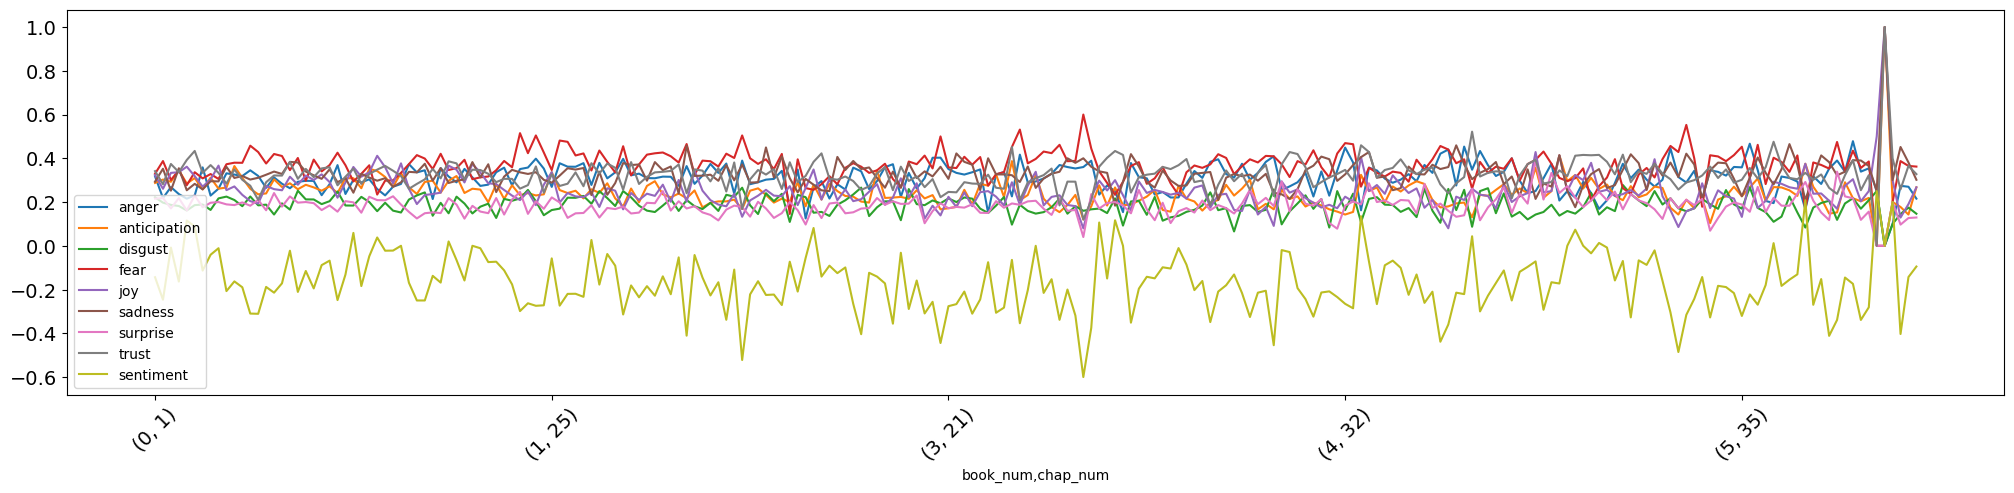

In [23]:
plot_sentiments(CHAP_SENT, emo_cols)

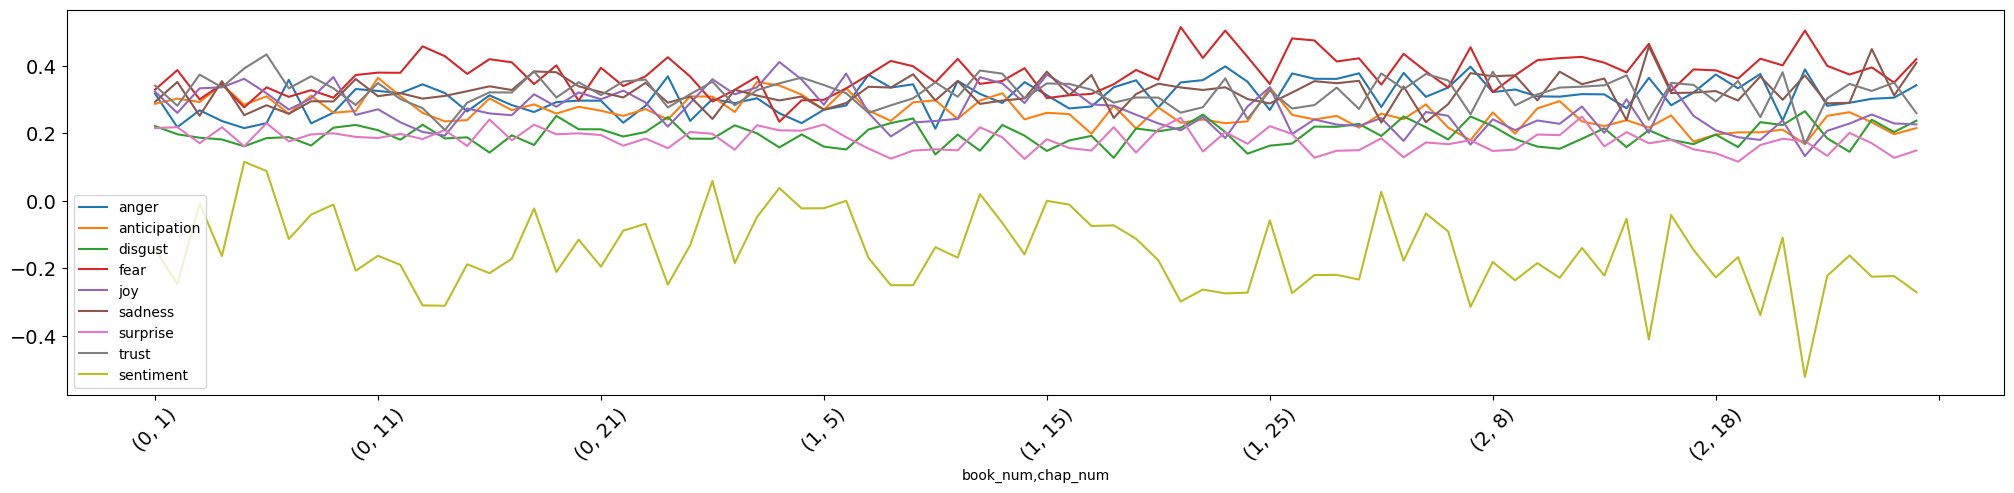

In [24]:
plot_sentiments(CHAP_HungerGames, emo_cols)

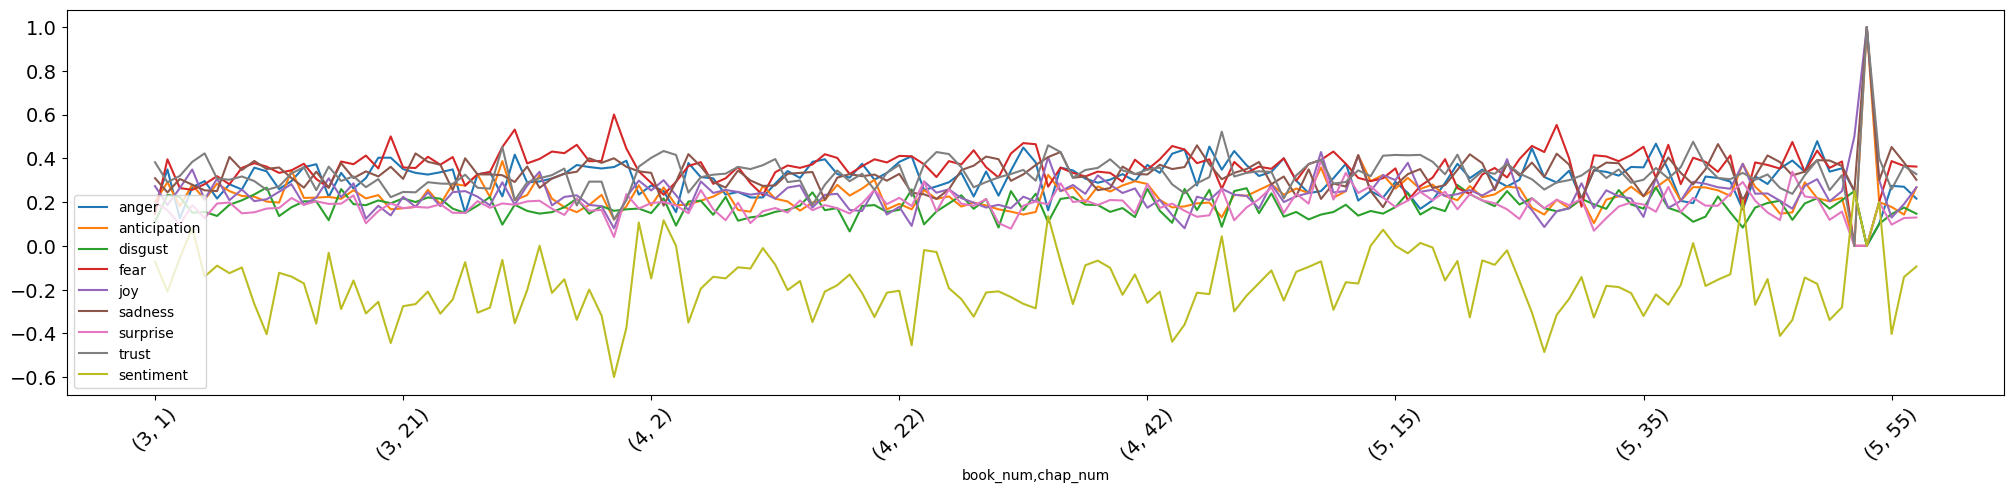

In [25]:
plot_sentiments(CHAP_Divergent, emo_cols)

In [26]:
VOCAB_SENT.to_csv("data/VOCAB_SENT.csv")
BOW_SENT.to_csv("data/BOW_SENT.csv")
CHAP_SENT.to_csv("data/CHAP_SENT.csv")